In [14]:
from camel_tools.sentiment import SentimentAnalyzer
import pandas as pd

# Initialize the Sentiment Analyzer
sa = SentimentAnalyzer("CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")

# Read the CSV File
df = pd.read_csv("Bishri_output.csv")  # Replace with the path to your CSV file

# Specify the Target Word(s)
target_words = ['اسلام سياسي']  # Replace with your target words

# Initialize a list to store the sentiment results
sentiment_results = []

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    for target_word in target_words:
        cell_value = row['Text']  # Replace 'column_name' with the actual column name containing text data

        # Check if the target word is present in the cell
        if target_word in cell_value:
            sentiment = sa.predict([cell_value])[0]
            sentiment_results.append({'Index': index, 'Sentiment': sentiment, 'Text': cell_value})

# Create a DataFrame from the sentiment results
sentiment_df = pd.DataFrame(sentiment_results)

# Export the Results to a CSV File (optional)
sentiment_df.to_csv("sentiment_results_Bishri.csv", index=False)  # Change the filename as needed


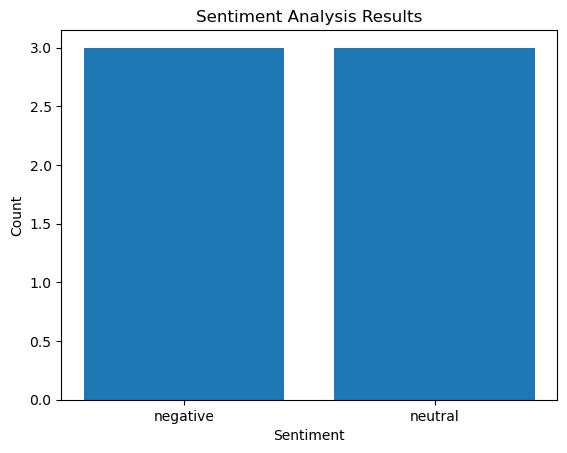

In [15]:
import matplotlib.pyplot as plt

# Read the sentiment results CSV file
sentiment_df = pd.read_csv("sentiment_results_Bishri.csv")  # Replace with your CSV filename

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and a title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

# Show the bar chart
plt.show()

